In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
names = ['lgbm_trial7.log', 'xgboost_trial7.log', 'catboost_trial7.log']

In [10]:
dfs = []
for name in names:
    loss = []
    time = []

    with open(name) as f:
        lines = f.readlines()
        lines = [line.rstrip() for line in lines]
        for line in lines:
            line = line.split(' ')
            for i in range(len(line)):
                if 'loss' in line[i]:
                    loss.append(float(line[i+1].split(',')[0]))
                if 'trial_time' in line[i]:
                    time.append(float(line[i+1].split(',')[0]))

    df = pd.DataFrame({'loss':loss, 'time':time})
    dfs.append(df)

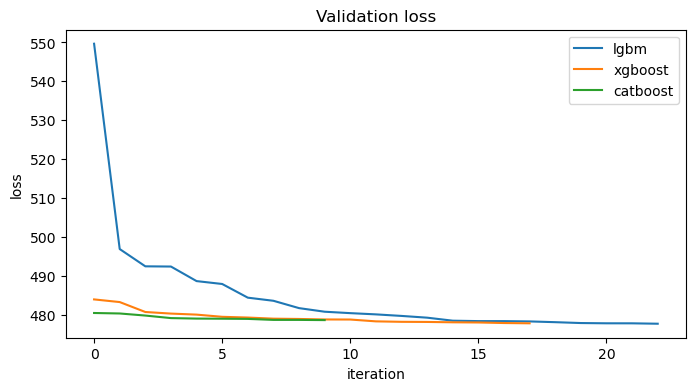

In [17]:
# Plot training process
fig, ax = plt.subplots(figsize=(8, 4))
#use index as x-axis
sns.lineplot(data=dfs[0], x=dfs[0].index, y="loss", ax=ax, label='lgbm')
sns.lineplot(data=dfs[1], x=dfs[1].index, y="loss", ax=ax, label='xgboost')
sns.lineplot(data=dfs[2], x=dfs[2].index, y="loss", ax=ax, label='catboost')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
ax.set_title('Validation loss')
plt.savefig('loss.png', dpi=300)

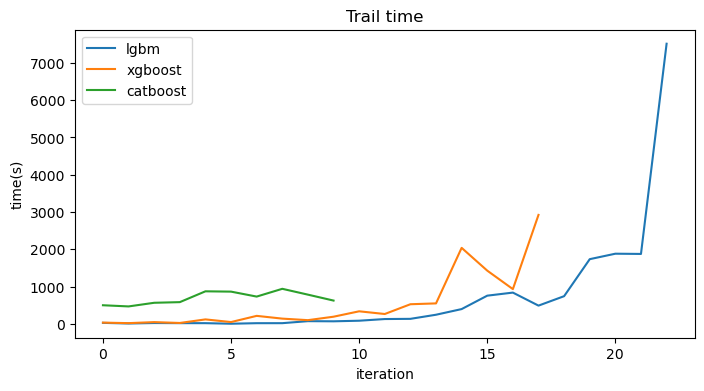

In [19]:
# Plot trail time
fig, ax = plt.subplots(figsize=(8, 4))
#use index as x-axis
sns.lineplot(data=dfs[0], x=dfs[0].index, y="time", ax=ax, label='lgbm')
sns.lineplot(data=dfs[1], x=dfs[1].index, y="time", ax=ax, label='xgboost')
sns.lineplot(data=dfs[2], x=dfs[2].index, y="time", ax=ax, label='catboost')
ax.set_xlabel('iteration')
ax.set_ylabel('time(s)')
ax.set_title('Trail time')
plt.savefig('time.png', dpi=300)